In [35]:
import numpy as np 
import pandas as pd 
import os
import missingno
import matplotlib.pyplot as plt

# Dataset Statistics

In [36]:
data = pd.read_csv("../input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv")
print("Number of rows : {}".format(data.shape[0]))
print("Number of columns : {}".format(data.shape[1]))
print("List of columsn : {}".format(list(data.columns)))
print("Number of duplicates : {}".format(len(data)-len(data.drop_duplicates())))
#print("Memory usage : {}".format(data.memory_usage()))

Number of rows : 550
Number of columns : 7
List of columsn : ['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre']
Number of duplicates : 0


In [122]:
data[data.duplicated(subset=['Name'])].head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre


In [38]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB
None


In [39]:
print("Min Year : {}".format(data.Year.min()))
print("Max Year : {}".format(data.Year.max()))
print("Type Books : {}".format(data.Genre.unique()))
print("Number of diffrent Authors : {}".format(len(data.Author.unique())))
print("Number of diffrent Names : {}".format(len(data.Name.unique())))


Min Year : 2009
Max Year : 2019
Type Books : ['Non Fiction' 'Fiction']
Number of diffrent Authors : 248
Number of diffrent Names : 351


* Name has a high cardinality: 351 distinct values
*  Author has a high cardinality: 248 distinct values

In [42]:
data.drop_duplicates(inplace=True,subset=['Name'])
data.shape

(351, 7)

In [96]:
data.isna().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

No Missing values

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

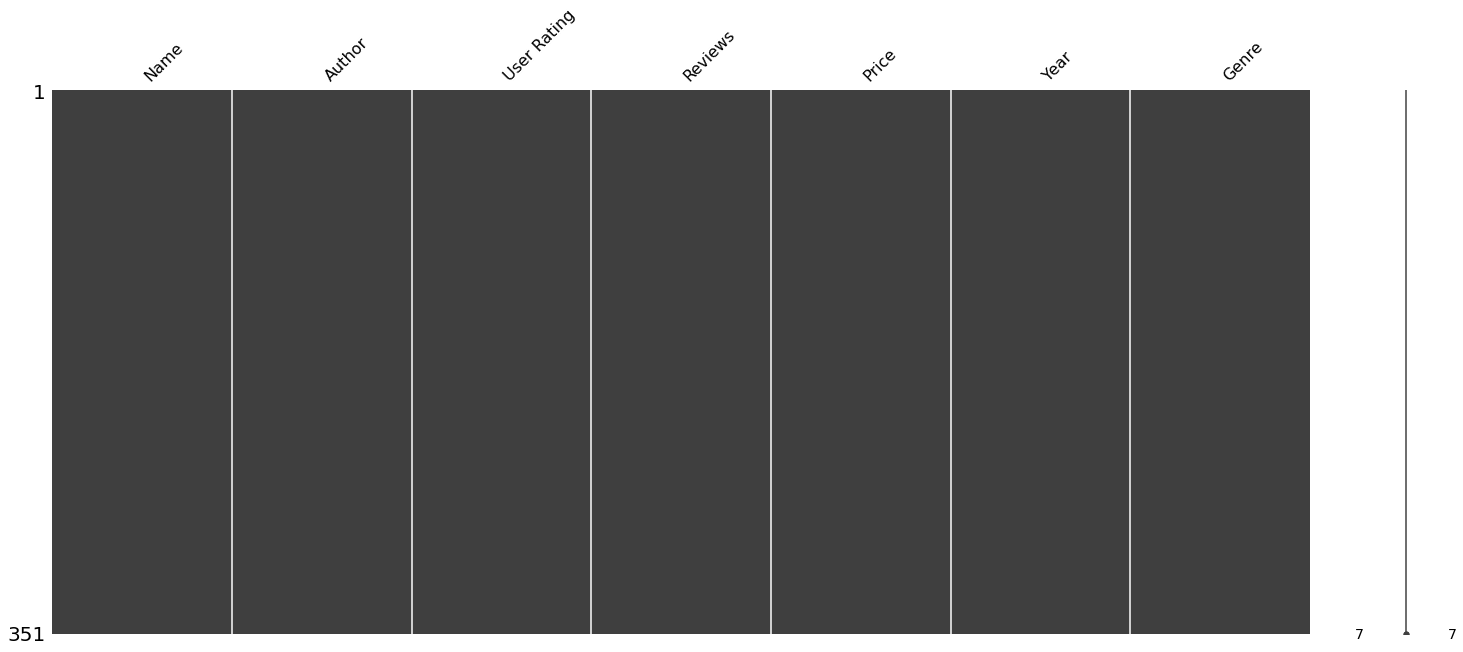

In [85]:
# visualay
missingno.matrix(data)

# Dataset Insights

In [123]:
## Check for skwness of data 
data.skew()

User Rating   -1.534145
Reviews        3.142875
Price          3.982321
Year           0.153855
dtype: float64

In [125]:
## Check for skwness of data 
data.kurt()

User Rating     4.209488
Reviews        14.619735
Price          27.259799
Year           -1.272749
dtype: float64

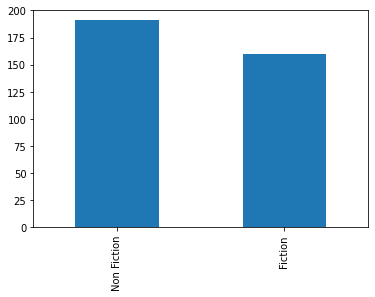

In [98]:
data['Genre'].value_counts().plot(kind='bar')
plt.show()

### Data Distribution

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/co

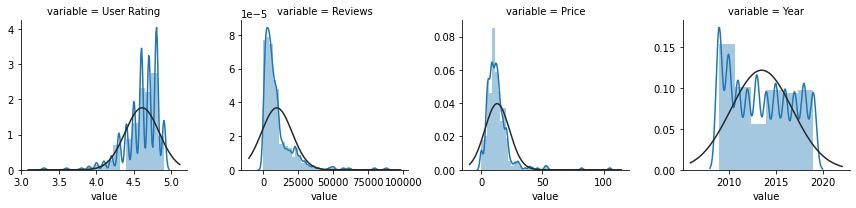

In [47]:
import seaborn as sns
from scipy.stats import skew, boxcox_normmax, norm
from scipy import stats

# Histogram to display skewness of every numeric variable
numeric_types = ["int","float"] 
f = pd.melt(data, value_vars = data.select_dtypes(numeric_types).columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g.map(lambda _x, **kwargs: sns.distplot(_x, fit = norm, kde_kws={'bw': 0.1}), 'value');
plt.show()


None of the columns has a normal distribution

In [48]:
data.select_dtypes(numeric_types).columns

Index(['User Rating', 'Reviews', 'Price', 'Year'], dtype='object')

<Figure size 1440x720 with 0 Axes>

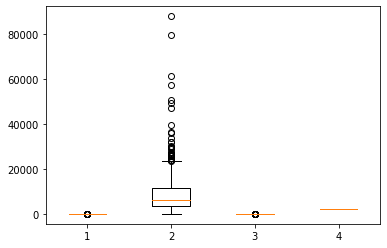

In [49]:
## Cheking for outliers
plt.figure(figsize=(20,10))
fig, ax = plt.subplots()
ax.boxplot(x=data[data.select_dtypes(numeric_types).columns])
plt.show()

In [54]:
data['Genre'].value_counts()

Non Fiction    191
Fiction        160
Name: Genre, dtype: int64

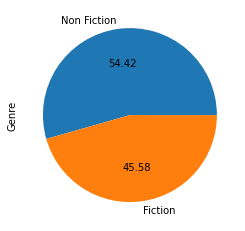

In [55]:
data['Genre'].value_counts().plot(kind='pie',autopct='%.2f',labels=data['Genre'].unique())
plt.show()

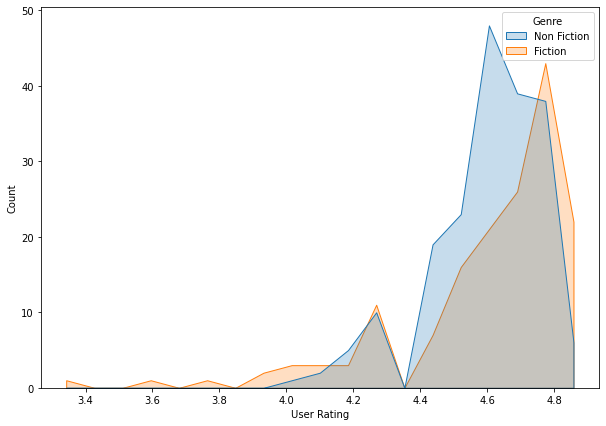

In [56]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.histplot(x=data['User Rating'],hue=data['Genre'],element='poly')
plt.show()

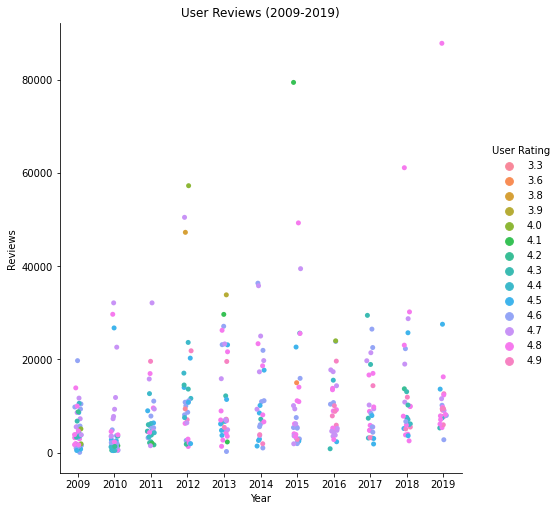

In [121]:
p = sns.catplot(x="Year", y="Reviews", data=data,hue="User Rating")
p.fig.set_figwidth(8)
p.fig.set_figheight(7)
plt.title('User Reviews (2009-2019)')
plt.show()

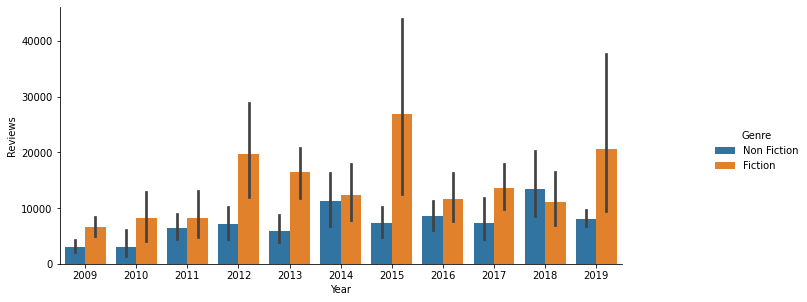

In [120]:
g = sns.catplot(x="Year", y="Reviews", hue="Genre", kind="bar", data=data)
g.fig.set_figwidth(12)
g.fig.set_figheight(4)

In [57]:
## number books per year 
bookPer_year = data.groupby('Year')
numberRevsPerYear = bookPer_year['Reviews'].sum()

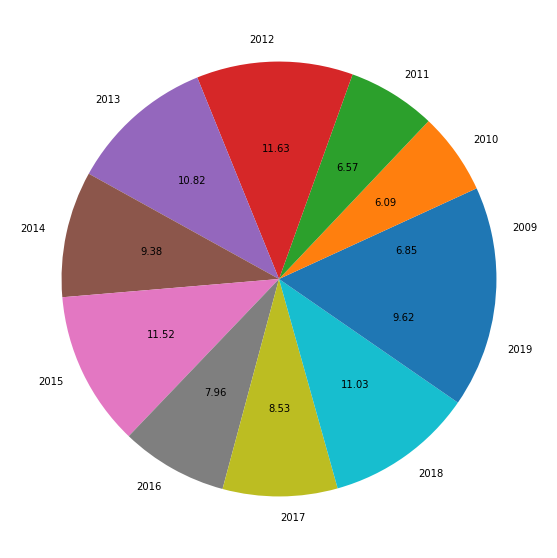

In [58]:
plt.figure(figsize=(10,10))
plt.pie(x=numberRevsPerYear, autopct="%.2f", labels=numberRevsPerYear.index)
plt.show()

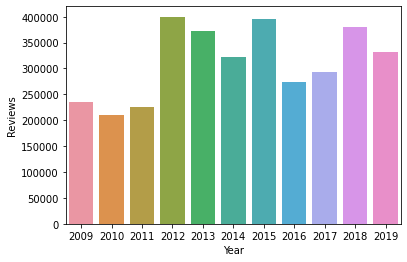

In [59]:
sns.barplot(x=numberRevsPerYear.index,y=numberRevsPerYear)
plt.show()

In [95]:
booksPerGenre1 = data[data['Genre']=='Non Fiction'].sort_values('Reviews',ascending=False)[:10]
booksPerGenre1

,Name,Author,User Rating,Reviews,Price,Year,Genre
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction
515,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16,2010,Non Fiction
97,Educated: A Memoir,Tara Westover,4.7,28729,15,2018,Non Fiction
464,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.6,26490,15,2017,Non Fiction
325,The 5 Love Languages: The Secret to Love that ...,Gary Chapman,4.8,25554,8,2015,Non Fiction
166,How to Win Friends & Influence People,Dale Carnegie,4.7,25001,11,2014,Non Fiction
351,The Boys in the Boat: Nine Americans and Their...,Daniel James Brown,4.8,23358,12,2014,Non Fiction
375,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,4.7,23308,6,2013,Non Fiction
293,School Zone - Big Preschool Workbook - Ages 4 ...,School Zone,4.8,23047,6,2018,Non Fiction
423,The Life-Changing Magic of Tidying Up: The Jap...,Marie Kondō,4.5,22641,11,2015,Non Fiction
